In [1]:
from dataset import CustomDataset

import numpy as np
import matplotlib.pyplot as plt
import albumentations as A
from albumentations.pytorch.transforms import ToTensorV2

from torch.utils.data import DataLoader

In [2]:
transform = A.Compose([
    A.Normalize(),
    ToTensorV2()
])
imgs = np.load("../data/sprites_1788_16x16.npy")
labels = np.load("../data/sprite_labels_nc_1788_16x16.npy")
dataset = CustomDataset(imgs=imgs, labels=labels, transforms=transform)

In [3]:
dataset[0]["img"].shape

torch.Size([3, 16, 16])

In [4]:
data_lodaer = DataLoader(dataset, batch_size=32, shuffle=True)
data_loader_iter = iter(data_lodaer)

In [7]:
samples = next(data_loader_iter)
x_0s = samples["img"][:6].numpy()
x_ts = samples["x_t"][:6].numpy()
epss = samples["eps"][:6].numpy()
ts =  samples["t"][:6].numpy()

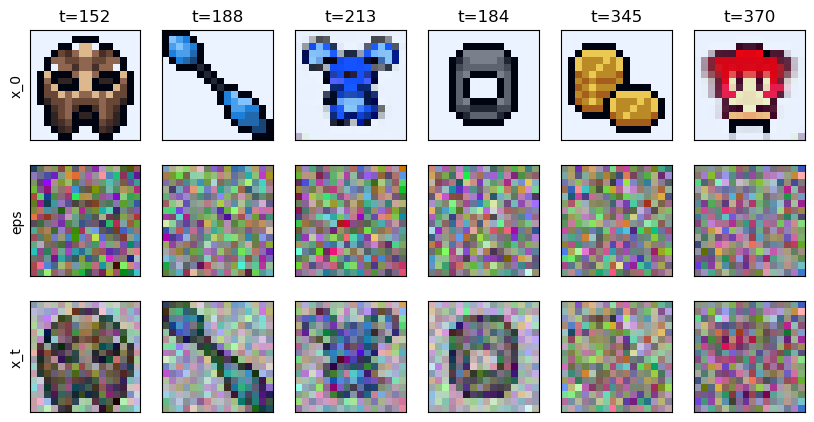

In [8]:
fig, axs = plt.subplots(figsize=(10,5), nrows=3, ncols=6)

i = 0
for (x_0, x_t, eps, t) in zip(x_0s, x_ts, epss, ts):
    x_0 = x_0.transpose(1,2,0)
    x_0 = ((x_0 - x_0.min()) / (x_0.max() - x_0.min())).clip(0,1)
    axs[0][i].imshow(x_0)
    axs[0][i].set_title(f"t={t}")
    axs[0][i].set_xticks([])
    axs[0][i].set_yticks([])

    eps = eps.transpose(1,2,0)
    eps = ((eps - eps.min()) / (eps.max() - eps.min())).clip(0,1)
    axs[1][i].imshow(eps)
    axs[1][i].set_xticks([])
    axs[1][i].set_yticks([])

    x_t = x_t.transpose(1,2,0)
    x_t = ((x_t - x_t.min()) / (x_t.max() - x_t.min())).clip(0,1)
    axs[2][i].imshow(x_t)
    axs[2][i].set_xticks([])
    axs[2][i].set_yticks([])

    if i == 0:
        axs[0][i].set_ylabel('x_0')
        axs[1][i].set_ylabel('eps')
        axs[2][i].set_ylabel('x_t')

    i += 1

plt.show()